In [1]:
!pip install sklearn

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

In [5]:
from sklearn.model_selection import train_test_split
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
dftrain = pd.read_excel(io='https://github.com/ajtheb/COVID-inf_prob/blob/master/Train_dataset.xlsx?raw=true',sheet_name='Diuresis_TS')
dfeval = pd.read_excel(io='https://github.com/ajtheb/COVID-inf_prob/blob/master/Test_dataset.xlsx?raw=true')
#y_train = dftrain.pop('Infect_Prob')


In [0]:
dftrain2 = pd.read_excel(io='https://github.com/ajtheb/COVID-inf_prob/blob/master/Train_dataset.xlsx?raw=true',sheet_name='Diuresis_TS')

In [45]:
dftrain.head()

,people_ID,2020-03-20 00:00:00,2020-03-21 00:00:00,2020-03-22 00:00:00,2020-03-23 00:00:00,2020-03-24 00:00:00,2020-03-25 00:00:00,2020-03-26 00:00:00
0,1,441,544.2,669.64,821.368,1002.2416,1215.68992,1472.627904
1,2,151,197.2,253.24,321.688,399.9256,492.91072,606.892864
2,3,416,515.2,632.44,776.728,947.7736,1150.32832,1395.793984
3,4,410,506.0,621.40,761.880,928.1560,1126.78720,1368.344640
4,5,390,483.0,595.00,730.200,892.8400,1084.40800,1315.889600


In [8]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10714 entries, 0 to 10713
Data columns (total 8 columns):
people_ID              10714 non-null int64
2020-03-20 00:00:00    10714 non-null int64
2020-03-21 00:00:00    10714 non-null float64
2020-03-22 00:00:00    10714 non-null float64
2020-03-23 00:00:00    10714 non-null float64
2020-03-24 00:00:00    10714 non-null float64
2020-03-25 00:00:00    10714 non-null float64
2020-03-26 00:00:00    10714 non-null float64
dtypes: float64(6), int64(2)
memory usage: 669.8 KB


In [11]:
dftrain.columns

Index([        'people_ID', 2020-03-20 00:00:00, 2020-03-21 00:00:00,
       2020-03-22 00:00:00, 2020-03-23 00:00:00, 2020-03-24 00:00:00,
       2020-03-25 00:00:00, 2020-03-26 00:00:00],
      dtype='object')

In [0]:
dftrain,val = train_test_split(dftrain, test_size=0.2)

In [0]:
dftrain.columns=['people_ID','d1','d2','d3','d4','d5','d6','d7']
val.columns=['people_ID','d1','d2','d3','d4','d5','d6','d7']
dftrain2.columns=['people_ID','d1','d2','d3','d4','d5','d6','d7']

In [98]:
dftrain2.head()

,people_ID,d1,d2,d3,d4,d5,d6,d7
0,1,441,544.2,669.64,821.368,1002.2416,1215.68992,1472.627904
1,2,151,197.2,253.24,321.688,399.9256,492.91072,606.892864
2,3,416,515.2,632.44,776.728,947.7736,1150.32832,1395.793984
3,4,410,506.0,621.40,761.880,928.1560,1126.78720,1368.344640
4,5,390,483.0,595.00,730.200,892.8400,1084.40800,1315.889600


In [0]:

dx=[]
dy=[]
dx_val=[]
dy_val=[]
for ind in dftrain.index: 
     l=[dftrain['d1'][ind], dftrain['d2'][ind],dftrain['d3'][ind],dftrain['d4'][ind],dftrain['d5'][ind],dftrain['d6'][ind]]
     dx.append(l)
     dy.append(dftrain['d7'][ind])
for ind in val.index: 
     l=[val['d1'][ind], val['d2'][ind],val['d3'][ind],val['d4'][ind],val['d5'][ind],val['d6'][ind]]
     dx_val.append(l)
     dy_val.append(val['d7'][ind])

In [0]:
dx_27=[]
for ind in dftrain2.index: 
     l=[dftrain2['d2'][ind], dftrain2['d3'][ind],dftrain2['d4'][ind],dftrain2['d5'][ind],dftrain2['d6'][ind],dftrain2['d7'][ind]]
     dx_27.append(l)

In [0]:
dx_27=np.array(dx_27)
dx_27=dx_27.reshape(dx_27.shape[0],dx_27.shape[1],1)

In [108]:
dy_27=np.zeros(10714)
dy_27=np.array(dy_27)
dy_27.reshape(10714)

array([0., 0., 0., ..., 0., 0., 0.])

In [0]:
dx=np.array(dx)
dy=np.array(dy)
dx_val=np.array(dx_val)
dy_val=np.array(dy_val)
dx=dx.reshape(dx.shape[0],dx.shape[1],1)
#dy.reshape(dy.shape[0],dy.shape[1],1)
dx_val=dx_val.reshape(dx_val.shape[0],dx_val.shape[1],1)
#dy_val.reshape(dy_val.shape[0],dy_val.shape[1],1)

In [68]:
dx.shape


(8571, 6, 1)

In [0]:
def create_time_steps(length):
  return list(range(-length, 0))
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
                label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

In [0]:
def baseline(history):
  return np.mean(history)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

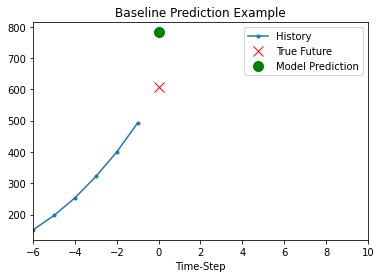

In [38]:
show_plot([dx[1], dy[1], baseline(dx[0])], 0,
           'Baseline Prediction Example')

In [0]:
BATCH_SIZE = 128
BUFFER_SIZE = 1000

train_univariate = tf.data.Dataset.from_tensor_slices((dx, dy))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((dx_val,dy_val))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [0]:
test_univariate = tf.data.Dataset.from_tensor_slices((dx_27,dy_27))
test_univariate = test_univariate.batch(BATCH_SIZE).repeat()

In [41]:
dx.shape

(10714, 6)

In [0]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(20, input_shape=dx.shape[-2:]),
    
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')

In [71]:
for x, y in val_univariate.take(1):
    print(simple_lstm_model.predict(x).shape)

(32, 1)


In [95]:
EVALUATION_INTERVAL = 1000
EPOCHS = 130

simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=100)

Train for 1000 steps, validate for 100 steps
Epoch 1/130
1000/1000 [==============================] - 6s 6ms/step - loss: 974.5526 - val_loss: 973.5507
Epoch 2/130
1000/1000 [==============================] - 5s 5ms/step - loss: 964.4108 - val_loss: 963.8642
Epoch 3/130
1000/1000 [==============================] - 5s 5ms/step - loss: 954.6932 - val_loss: 954.2970
Epoch 4/130
1000/1000 [==============================] - 5s 5ms/step - loss: 945.3243 - val_loss: 944.7592
Epoch 5/130
1000/1000 [==============================] - 5s 5ms/step - loss: 935.8067 - val_loss: 935.2315
Epoch 6/130
1000/1000 [==============================] - 5s 5ms/step - loss: 925.1687 - val_loss: 924.2175
Epoch 7/130
1000/1000 [==============================] - 5s 5ms/step - loss: 915.1143 - val_loss: 914.3914
Epoch 8/130
1000/1000 [==============================] - 5s 5ms/step - loss: 905.4513 - val_loss: 904.6071
Epoch 9/130
1000/1000 [==============================] - 5s 5ms/step - loss: 895.4024 - val_loss: 8

In [0]:
s=list(simple_lstm_model.predict(dx_27))

In [0]:
pid=list(dftrain2['people_ID'])

In [113]:
l=[]
for a in s:
  l.append(a[0])
print(l)

[1148.4448, 755.84546, 1148.4447, 1148.4446, 1148.4443, 1148.4442, 1148.4364, 884.8419, 1148.4296, 1055.1622, 1148.444, 885.4055, 1148.4445, 752.44934, 1148.4442, 1056.467, 905.81665, 847.2606, 848.45764, 991.4984, 1073.3983, 985.88794, 1148.4447, 918.01025, 753.7195, 1148.4441, 1082.0637, 858.9708, 1148.4436, 1148.4446, 1060.3733, 1046.7522, 1148.4335, 1096.0347, 1148.402, 1148.3639, 910.4624, 1148.4435, 862.48804, 824.66565, 1148.4434, 873.39746, 1148.4419, 1148.4447, 1110.4655, 752.4613, 1148.3934, 1148.4448, 752.4573, 1148.4435, 1007.23315, 1056.7781, 1148.4447, 752.4314, 1148.4342, 1148.4434, 1000.6079, 1101.7726, 1148.442, 1036.5566, 752.4884, 1055.2073, 1097.6979, 1148.4435, 991.7953, 1148.3954, 1148.4274, 1148.4376, 1148.4431, 947.0348, 940.90063, 1028.446, 752.4237, 1148.4338, 1148.4443, 1063.9712, 1148.445, 1006.87573, 1148.4448, 1147.6884, 1148.4374, 760.90344, 1042.5452, 1148.4149, 753.21094, 1148.4445, 847.1836, 1067.076, 1148.3473, 1148.2748, 1148.4443, 1148.4447, 1148.42

In [0]:
df = pd.DataFrame(list(zip(l)), 
               columns =['Diuresis']) 

In [0]:
df.to_excel("diuresis27.xlsx")
from google.colab import files
files.download('diuresis27.xlsx')